In [287]:
#подключаем необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,9)
import matplotlib.cm as cm



## В данном файле представлено решение задачи многоклассовой классификации: распознование британских гласных по данным с динамиков

### Считываем данные

In [288]:
data = pd.read_csv("vowel.scale.txt", sep = "\s+ | |:", header = None, engine = 'python')

In [289]:
data = data.iloc[:,[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]]
data.columns = ['vowel_number', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [290]:
data.head()

,vowel_number,1,2,3,4,5,6,7,8,9,10
0,0,-0.263700,-0.466919,-0.068205,0.771111,-0.010106,0.557382,-0.218367,0.228591,-0.494182,-0.436931
1,1,-0.117564,-0.442344,-0.080513,0.541111,-0.059121,0.750869,-0.201361,0.215779,-0.321013,-0.224967
2,2,0.447775,-0.316950,-0.532821,-0.135556,-0.282466,0.514385,-0.348299,0.327714,-0.449692,0.060468
3,3,0.369555,-0.028670,-0.492821,0.345000,-0.457302,0.198862,-0.340136,0.030344,0.041752,-0.424577
4,4,0.223888,0.011972,-0.158462,0.372778,-0.750379,0.011698,0.313605,-0.229265,0.293634,-0.165150


### Перемешиваем данные для обучения модели

In [291]:
shuffle_data = shuffle(data)
shuffle_data.head()

,vowel_number,1,2,3,4,5,6,7,8,9,10
253,0,0.476815,-0.790800,-0.492308,0.169444,0.111167,0.668037,0.471429,0.750506,-0.027379,-0.257477
268,4,0.148946,0.052615,0.116410,-0.518889,-0.272360,-0.413848,0.644898,-0.012138,-0.206708,0.031860
353,1,-0.207026,-0.373031,0.088205,0.776111,0.369884,0.589630,-0.028571,-0.138908,-0.923340,0.093628
130,9,-0.874941,0.448960,0.283077,-0.173333,-0.224861,0.190642,0.274830,0.071477,-0.206023,0.333550
1,1,-0.117564,-0.442344,-0.080513,0.541111,-0.059121,0.750869,-0.201361,0.215779,-0.321013,-0.224967


### Сохраняем данные для обучения в переменную fit_data а ответы в answers

In [292]:
fit_data = shuffle_data.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
fit_data.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
answers = shuffle_data.iloc[:, 0]

### Создаем модель решающего дерева и обучаем ее на $k = \frac{4}{5}$ наших данных

In [293]:
k = 4./5
fit_size = int(len(answers) * k)
model = tree.DecisionTreeClassifier()
model.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Считаем долю правильных ответов модели на тестовой выборке

In [294]:
def accuracy(prediction, answer):
    i = 0.
    for x, y in zip(prediction, answer):
        if(x == y):
            i += 1
    return i / (len(answer))

round(accuracy(model.predict(fit_data.iloc[fit_size:]), answers.iloc[fit_size:]),3)

0.84

### Находим параметры модели, при которых достигается наибольшая точность

In [295]:
scores = []
depth = []
features = []
for d in range (1, 101):
    for f in range (1, 11):
        model = tree.DecisionTreeClassifier(max_depth = d, max_features = f)
        model.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])
        scores.append(accuracy(model.predict(fit_data.iloc[fit_size:]), answers.iloc[fit_size:]))
        depth.append(d)
        features.append(f)
print 'max_score:', round(scores[argmax(scores)],3), 'optimal_depth:', depth[argmax(scores)], 'optimal_number_of_features:', features[argmax(scores)]

max_score: 0.925 optimal_depth: 52 optimal_number_of_features: 4


### Визуализируем зависимость качества модели от данных параметров

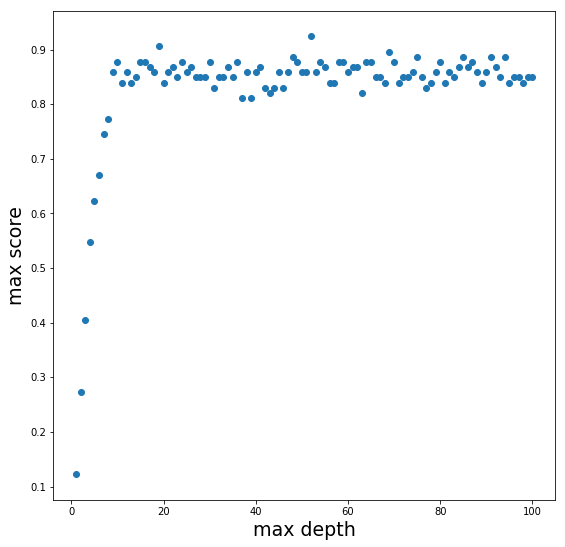

In [296]:
max_score = []

for i in range(1, 101):
    m = 0
    for j in range(0, len(scores)):
        if(scores[j] > m and depth[j] == i):
            m = scores[j]
    max_score.append(m)  
    
plt.scatter(range(1, 101), max_score)
plt.legend()
plt.ylabel('max score', fontsize=19)
plt.xlabel('max depth', fontsize=19);

### Создадим новую модель с оптимальными параметрами

In [297]:
model1 = tree.DecisionTreeClassifier(max_depth = depth[argmax(scores)], max_features = features[argmax(scores)])
model1.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=52,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Посторим график зависимости RMSE на тестовой выборке от количества признаков и от размера обучающей выборки

standart deviation: 0.909


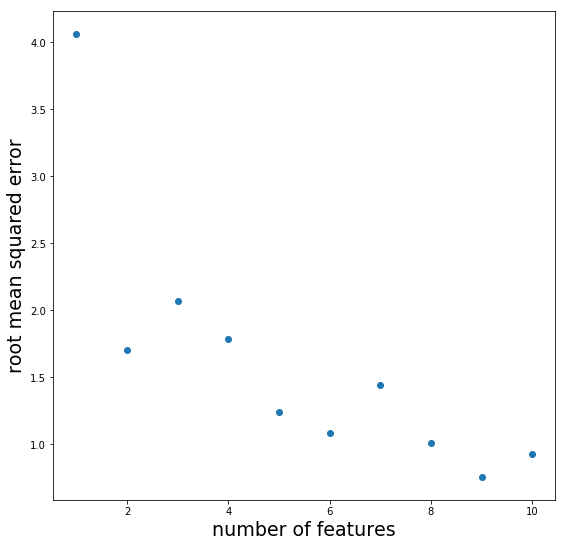

In [298]:
errors = []
for i in range(1, 11):
    model = tree.DecisionTreeClassifier()
    model.fit(fit_data.iloc[:fit_size].iloc[:,range(0,i)], answers.iloc[:fit_size])
    errors.append(np.sqrt(mean_squared_error(model.predict(fit_data.iloc[fit_size:].iloc[:,range(0,i)]), answers.iloc[fit_size:])))
    
plt.scatter(range(1, 11), errors)
plt.legend()
plt.ylabel('root mean squared error', fontsize=19)
plt.xlabel('number of features', fontsize=19);
print 'standart deviation:', round(np.std(errors), 3)

standart deviation: 0.666


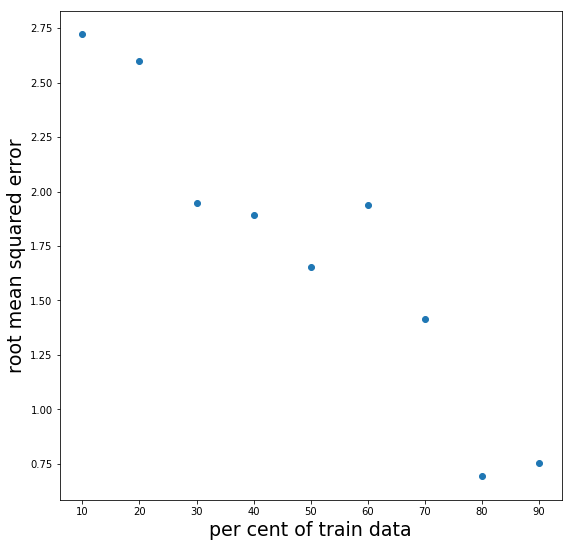

In [299]:
errors = []
for i in range(1, 10):
    k = i/10.
    fit_size = int(len(answers) * k)
    model = tree.DecisionTreeClassifier()
    model.fit(fit_data.iloc[:fit_size], answers.iloc[:fit_size])
    errors.append(np.sqrt(mean_squared_error(model.predict(fit_data.iloc[fit_size:]), answers.iloc[fit_size:])))
plt.scatter([10, 20, 30, 40, 50, 60, 70, 80, 90], errors)
plt.legend()
plt.ylabel('root mean squared error', fontsize=19)
plt.xlabel('per cent of train data', fontsize=19);
print 'standart deviation:', round(np.std(errors), 3)

### Изобразим сразу два параметра на 3D графике

In [300]:
def error(X, Y):
    errors = []
    for l in range(0, Y.size / len(Y[0])):
        for x in X[l]:
            i = x
            j = Y[l][0]
            k = j/100.
            fit_size = int(len(answers) * k)
            model = tree.DecisionTreeClassifier()
            model.fit(fit_data.iloc[:fit_size].iloc[:,range(0,i)], answers.iloc[:fit_size])
            errors.append(np.sqrt(mean_squared_error(model.predict(fit_data.iloc[fit_size:].iloc[:,range(0,i)]), 
                                                     answers.iloc[fit_size:])))
    ans = []
    j = 0
    while(j < len(errors)):
        out = []
        for i in range(0, len(X[0])):
            out.append(errors[j])
            j += 1
        ans.append(out)
    return np.matrix(ans)

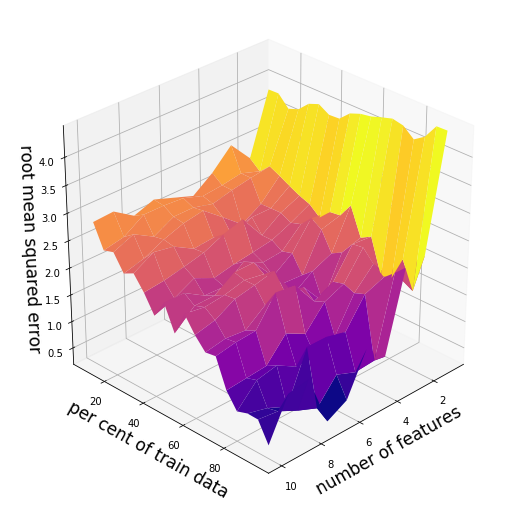

In [301]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') 
X = np.arange(1, 11, 1)
Y = np.arange(10, 100, 5)
X, Y = np.meshgrid(X, Y)
Z = error(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('number of features', fontsize=17)
ax.set_ylabel('per cent of train data', fontsize=17)
ax.set_zlabel('root mean squared error', fontsize=17)
ax.view_init(30, 45)


### Функция Show(i, j) иллюстрирует проекцию данных на пару признаков (i, j)

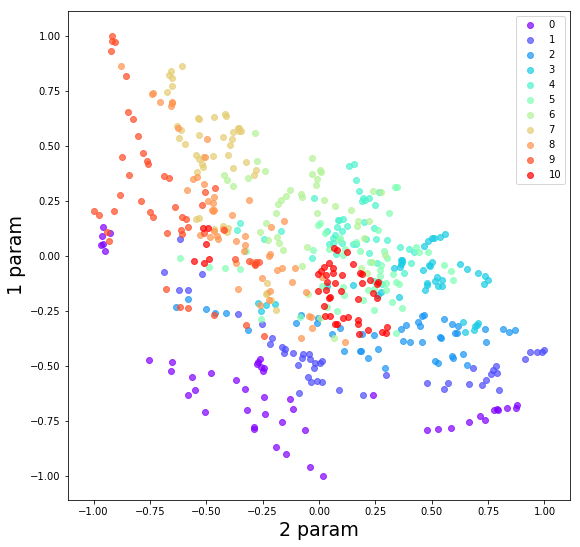

In [302]:
def Show(i, j):
    colors = cm.rainbow(np.linspace(0, 1, 11))
    predict = pd.DataFrame(model1.predict(fit_data))
    subset = pd.DataFrame(np.hstack((predict, fit_data.iloc[:,[i-1, j-1]])))
    for y, c in zip(range(0, 11), colors):
        plt.scatter(subset[subset[0] == y].iloc[:,[1]].dropna(), 
        subset[subset[0] == y].iloc[:,[2]].dropna(), 
        c = c, alpha = 0.7, label=str(y))
    plt.legend()
    plt.ylabel(str(i) + ' param', fontsize=19)
    plt.xlabel(str(j) + ' param', fontsize=19)
Show(1, 2)

### Реализуем метод понижения размерности MDS для получения более информативной визуализации

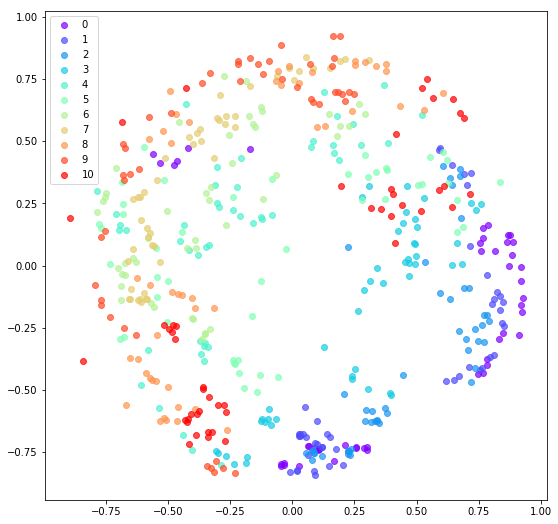

In [303]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances

subset_l  = 528
data_subset = fit_data[:subset_l]
response_subset = answers[:subset_l]

model2 = MDS(random_state = 7, dissimilarity = "precomputed")
mat_dist = pairwise_distances(data_subset, metric = 'cosine')
MDS_transformed_cos = model2.fit_transform(mat_dist) 

colors = cm.rainbow(np.linspace(0, 1, len(set(response_subset))))
for y, c in zip(set(response_subset), colors):
    plt.scatter(MDS_transformed_cos[response_subset.values == y, 0], 
                MDS_transformed_cos[response_subset.values == y, 1], 
                c=c, alpha=0.7, label=str(y))
plt.legend();

## Вывод: 
### Видно, что в выборке можно провести дугообразную кривую, которая разделяет объекты классов (0 - 4) и (5 - 10). Предположительно, что это длинные и короткие гласные звуки английского языка соответсвенно